In [ ]:
## VIDEO PROCESSING


In [1]:
import cv2 as cv
import numpy as np
import glob
import os
import pickle
import matplotlib.pyplot as plt
from IPython.display import clear_output, Image, display
import PIL.Image
import io
import torch

In [2]:
def show_image(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [107]:
def read_frames(video_path, only_table=True):
    frames = []
    cap = cv.VideoCapture(video_path)  
    if cap.isOpened() == False: 
        print("Error opening video stream or file") 
        return frames
    
    while cap.isOpened():  
        ret, frame = cap.read() # Read the frame
        if ret is True:
            if (only_table):
                frames.append(find_table(frame)[0])
            else:
                frames.append(frame)
        else:
            break
    cap.release()
    return frames

def open_video(path, show_table=False):
    frames = []
    cap = cv.VideoCapture(path)
    
    if cap.isOpened() == False: 
        print("Error opening video stream or file") 
    # Display the video
    current_frame = 0
    max_number_of_frame_to_run = 15000
    
    while cap.isOpened(): 
        ret, frame = cap.read() # Read the frame
        frames.append(frame)
        if ret is True:
            
#             if (current_frame == 0):
#                 overlayed_image = frame
#             else:
#                 overlayed_image = cv.addWeighted(frame, 0.4, overlayed_image, 0.6, 0)
            current_frame = current_frame + 1 
           
            if current_frame > max_number_of_frame_to_run:
                break  
        else:
            break
    cv.imwrite('overlayed_image.png', overlayed_image)
    # after playing the video, release the video capture    
    cap.release()
    # close all the frames
    cv.destroyAllWindows()
    
    return frames

In [ ]:
frames = open_video('./data/training_data/test_videos/with_rips/rip_21.mp4')

In [ ]:
def merge_frames(frames):
    print(len(frames))
    if (len(frames) > 1):
        new_frames = []
        for i in range(1, len(frames), 2):
            new_frames.append(cv.addWeighted(frames[i-1], 0.5, frames[i], 0.6, 0))
        merge_frames(new_frames)
    else:
        show_image(frames[0])
        
        

merge_frames(frames)

(870, 869, 3)
(798, 799, 3)
(798, 799, 3)


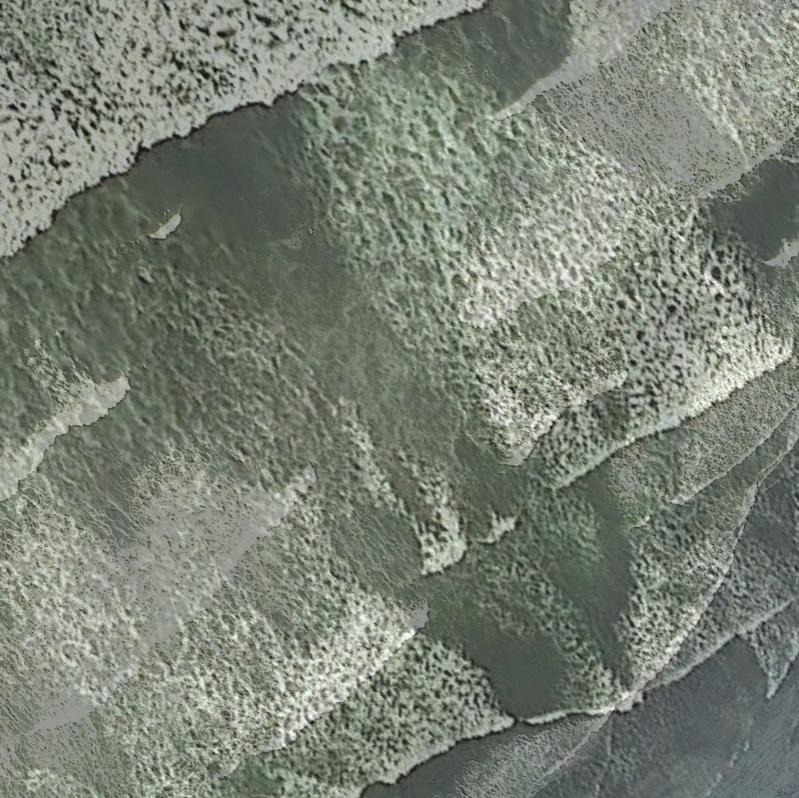

In [33]:
src1 = cv.imread(cv.samples.findFile('./data/images/test/rip-1005.png'))
src2 = cv.imread(cv.samples.findFile('./data/images/test/rip-1018.png'))
                 
print(src1.shape)
src2_shape = src2.shape
print(src2_shape)

src1_new = src1[:src2_shape[0], :src2_shape[1]]

print(src1_new.shape)
                                     
overlayed_image = cv.addWeighted(src1_new, 0.4, src2, 0.6, 0.0)
                
show_image(overlayed_image)                     

In [ ]:
show_image()

In [ ]:
overlayed_image = cv.addWeighted(current_frame, 0.5, overlayed_image, 0.5, 0)

In [2]:
# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Downloading: "https://github.com/ultralytics/yolov5/archive/master.zip" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2021-8-19 torch 1.8.0a0+52ea372 CUDA:0 (Tesla V100-PCIE-16GB, 16160.5MB)



ERROR: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
Re-attempting https://github.com/ultralytics/yolov5/releases/download/v5.0/yolov5s.pt to /root/.cache/torch/hub/ultralytics_yolov5_master/yolov5s.pt...



Exception ignored in: <function tqdm.__del__ at 0x7fe1afaaf430>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/tqdm/std.py", line 1152, in __del__
    self.close()
  File "/opt/conda/lib/python3.8/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm' object has no attribute 'disp'


Exception: Cache may be out of date, try `force_reload=True`. See https://github.com/ultralytics/yolov5/issues/36 for help.

In [ ]:


# Images
dir = 'https://github.com/ultralytics/yolov5/raw/master/data/images/'
imgs = [dir + f for f in ('zidane.jpg', 'bus.jpg')]  # batch of images

# Inference
results = model(imgs)
results.print()  # or .show(), .save()